In [131]:
%matplotlib inline

In [132]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# YOUR CODE HERE
#raise NotImplementedError()

df = pd.read_excel('/Users/katiewhittington/Desktop/courseworkdata/births-trends-london-data.xls',
                  sheet_name='Figure 16', skiprows=[0,1],nrows=15)



df


,Unnamed: 0,EU,Rest of Europe (non-EU),Asia,Africa,Rest of World
0,2001,6977,3380,13489,13600,7612
1,2002,7311,3368,14333,14642,8405
2,2003,7918,3628,15404,16334,9006
3,2004,8733,3763,16498,18002,8911
4,2005,9811,3951,16960,19596,9134
5,2006,11309,4090,18206,20043,9874
6,2007,13371,4503,19153,20817,9807
7,2008,14624,4396,19882,20902,9920
8,2009,15950,4520,20550,20517,9836
9,2010,17971,4336,24180,20618,7810


In [134]:
#number of rows and columns
df.shape

(15, 6)

In [135]:
df.columns = ['Year','EU','Rest of Europe(non-EU)','Asia','Africa','Rest of World']

df.head(5)

,Year,EU,Rest of Europe(non-EU),Asia,Africa,Rest of World
0,2001,6977,3380,13489,13600,7612
1,2002,7311,3368,14333,14642,8405
2,2003,7918,3628,15404,16334,9006
3,2004,8733,3763,16498,18002,8911
4,2005,9811,3951,16960,19596,9134


In [136]:
#missing/null Values
df.isnull().sum()

Year                      0
EU                        0
Rest of Europe(non-EU)    0
Asia                      0
Africa                    0
Rest of World             0
dtype: int64

In [137]:
# Inspect the DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Year                    15 non-null     int64
 1   EU                      15 non-null     int64
 2   Rest of Europe(non-EU)  15 non-null     int64
 3   Asia                    15 non-null     int64
 4   Africa                  15 non-null     int64
 5   Rest of World           15 non-null     int64
dtypes: int64(6)
memory usage: 848.0 bytes


In [138]:
# dropping all those rows which  have any missing value in it. 
df.dropna(inplace = True) 
df.isnull().sum()

Year                      0
EU                        0
Rest of Europe(non-EU)    0
Asia                      0
Africa                    0
Rest of World             0
dtype: int64

In [139]:
#findding whether the dataset contain duplicate rows
df.duplicated().sum()

0

In [140]:
# Create a datetime series by parsing the years.
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Assign the year column to the index, creating a DatetimeIndex.
df.set_index('Year', inplace=True)

df.head(5)

,EU,Rest of Europe(non-EU),Asia,Africa,Rest of World
Year,,,,,
2001-01-01,6977,3380,13489,13600,7612
2002-01-01,7311,3368,14333,14642,8405
2003-01-01,7918,3628,15404,16334,9006
2004-01-01,8733,3763,16498,18002,8911
2005-01-01,9811,3951,16960,19596,9134


In [141]:
df[df.duplicated(keep=False)]

,EU,Rest of Europe(non-EU),Asia,Africa,Rest of World
Year,,,,,


In [142]:
# inspect data dtype
df.dtypes

EU                        int64
Rest of Europe(non-EU)    int64
Asia                      int64
Africa                    int64
Rest of World             int64
dtype: object

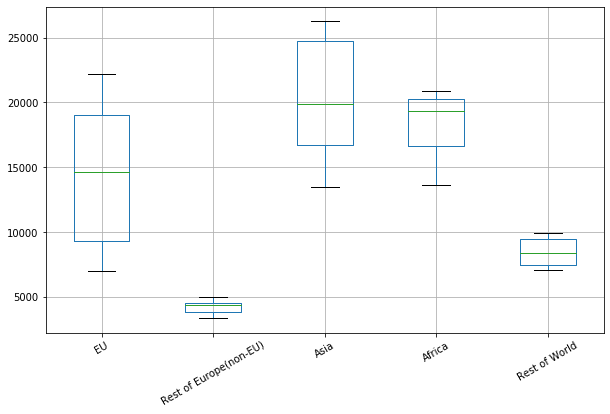

In [143]:
df.boxplot(['EU','Rest of Europe(non-EU)','Asia','Africa','Rest of World'],rot = 30,figsize=(10,6))

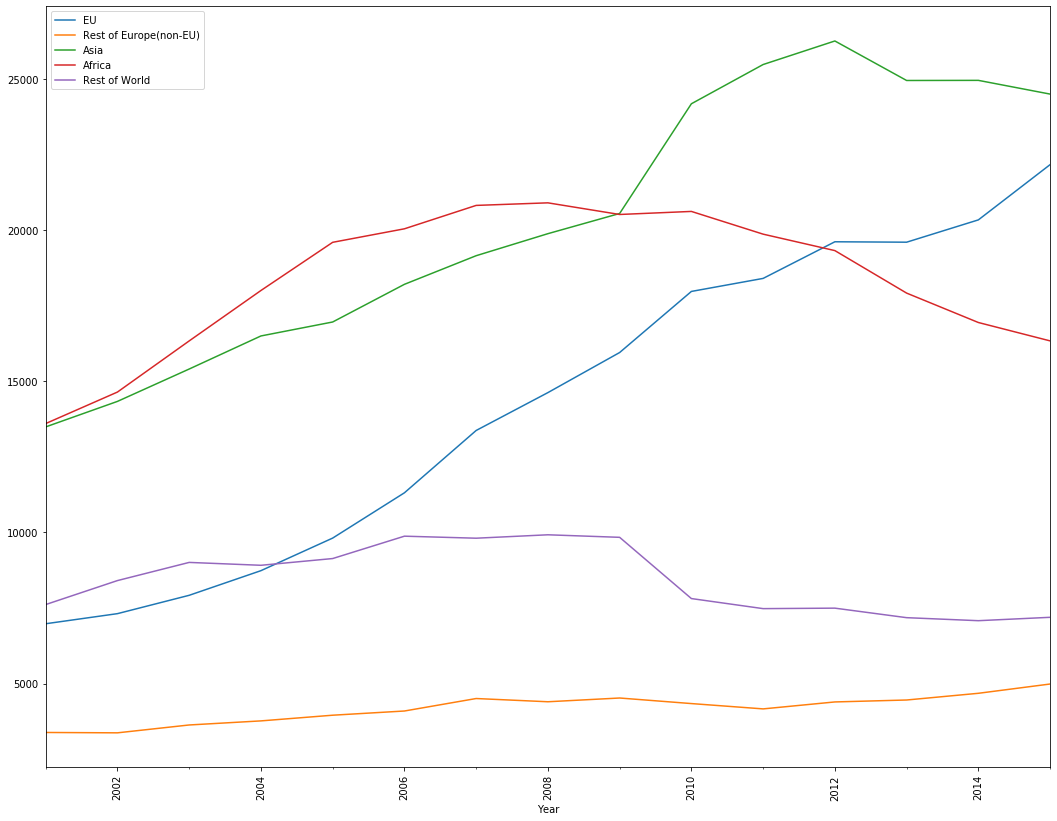

In [144]:
ax = df[['EU','Rest of Europe(non-EU)','Asia','Africa','Rest of World']].plot(rot=90,figsize=(18,14))

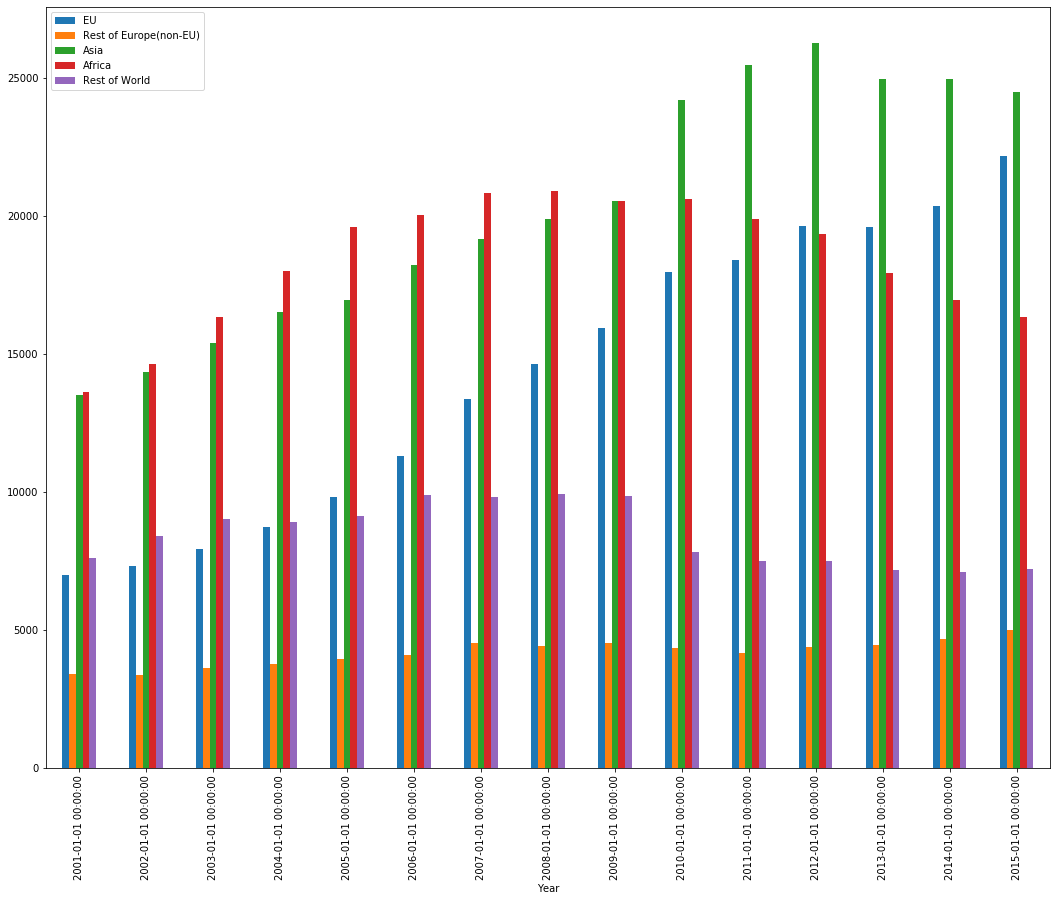

In [145]:
ax = df[['EU','Rest of Europe(non-EU)','Asia','Africa','Rest of World']].plot.bar(rot=90,figsize=(18,14))

In [115]:
year_avg = df[['EU','Rest of Europe(non-EU)','Asia','Africa','Rest of World']].groupby('Year').mean().sort_values(by='Year').reset_index()
year_avg.head()

,Year,EU,Rest of Europe(non-EU),Asia,Africa,Rest of World
0,2001-01-01,6977,3380,13489,13600,7612
1,2002-01-01,7311,3368,14333,14642,8405
2,2003-01-01,7918,3628,15404,16334,9006
3,2004-01-01,8733,3763,16498,18002,8911
4,2005-01-01,9811,3951,16960,19596,9134


In [127]:
df

,Year,E_U,R_e_s_t_ _o_f_ _E_u_r_o_p_e_(_n_o_n_-_E_U_),A_s_i_a,A_f_r_i_c_a,R_e_s_t_ _o_f_ _W_o_r_l_d
0,2001-01-01,6977,3380,13489,13600,7612
1,2002-01-01,7311,3368,14333,14642,8405
2,2003-01-01,7918,3628,15404,16334,9006
3,2004-01-01,8733,3763,16498,18002,8911
4,2005-01-01,9811,3951,16960,19596,9134
5,2006-01-01,11309,4090,18206,20043,9874
6,2007-01-01,13371,4503,19153,20817,9807
7,2008-01-01,14624,4396,19882,20902,9920
8,2009-01-01,15950,4520,20550,20517,9836
9,2010-01-01,17971,4336,24180,20618,7810


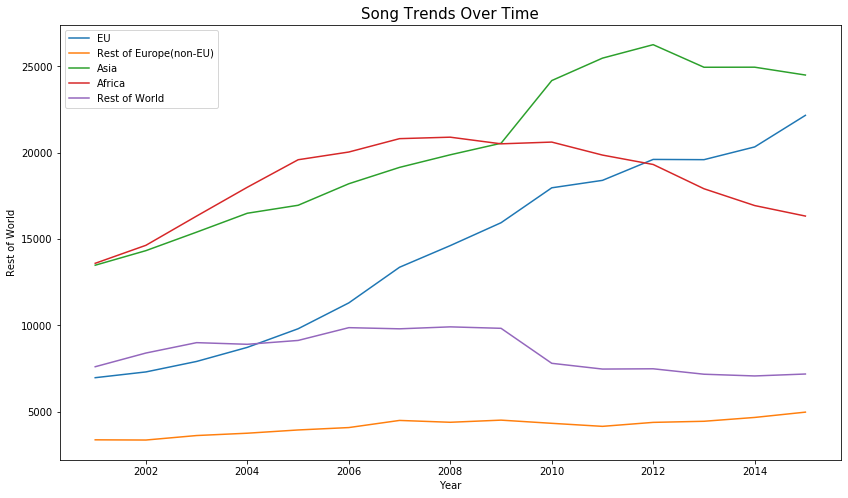

In [117]:
plt.figure(figsize=(14,8))
# plt.xticks(rotation=80)
plt.title("Song Trends Over Time", fontsize=15)
lines = ['EU','Rest of Europe(non-EU)','Asia','Africa','Rest of World']
for line in lines:
    ax = sns.lineplot(x='Year', y=line, data=year_avg)
plt.legend(lines)

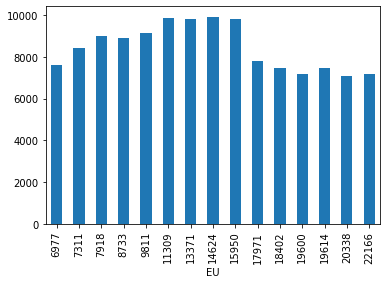

In [155]:
df.groupby(['EU'])['Rest of World'].sum().plot(kind='bar')


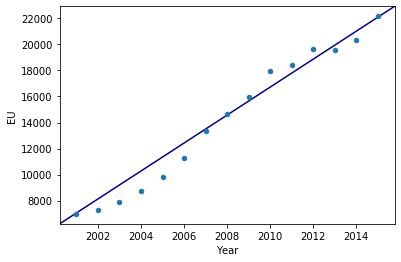

In [146]:
ax =df.reset_index().plot.scatter(x = 'Year', y = 'EU')
#ax = df.plot.scatter(x='Year',y='EU',rot=0,figsize=(10,4))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='darkblue', zorder=-1) 
plt.show()

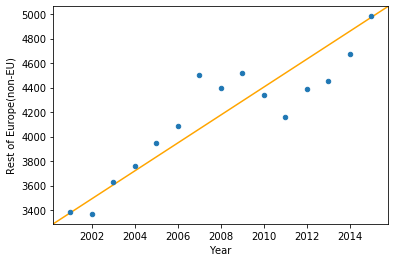

In [147]:
ax =df.reset_index().plot.scatter(x = 'Year', y = 'Rest of Europe(non-EU)')
#ax = df.plot.scatter(x='Year',y='EU',rot=0,figsize=(10,4))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='orange', zorder=-1) 
plt.show()

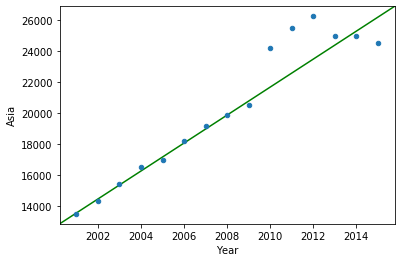

In [148]:
ax =df.reset_index().plot.scatter(x = 'Year', y = 'Asia')
#ax = df.plot.scatter(x='Year',y='Asia',rot=0,figsize=(10,4))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='green', zorder=-1) 
plt.show()

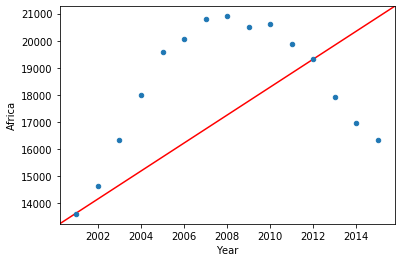

In [149]:
ax =df.reset_index().plot.scatter(x = 'Year', y = 'Africa')
#ax = df.plot.scatter(x='Year',y='Asia',rot=0,figsize=(10,4))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red', zorder=-1) 
plt.show()


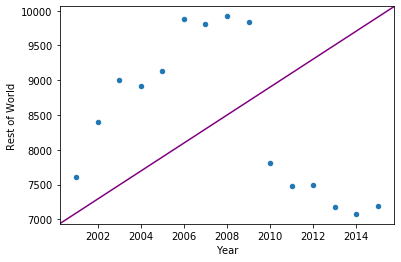

In [150]:
ax =df.reset_index().plot.scatter(x = 'Year', y = 'Rest of World')
#ax = df.plot.scatter(x='Year',y='Rest of World',rot=0,figsize=(10,4))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='purple', zorder=-1) 
plt.show()
#reset.index() was found on this link https://stackoverflow.com/questions/55169540/pandas-plot-scatter-plot-with-index